# Gradient Boosting
## Can do both Classification and Regression

## Regression Problem

In [23]:
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor

In [24]:
data = pd.read_csv('Startups.csv')

X = data.iloc[ : , 1: -1].values
y = data.iloc[ : , -1].values


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [15]:
gbr = GradientBoostingRegressor(max_depth = 2, n_estimators=120, learning_rate=1.0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## The staged predict Method:¶
### That wilil make prediction after each iteration of number of trees (1,2,3... ), then we can get the error for each iteration, and finally choose the number of trees with the minimum error

In [16]:
from sklearn.metrics import mean_squared_error

## Errors according to numbers of estimators:


In [17]:
errors = [ mean_squared_error(y_test, y_pred) for y_pred in gbr.staged_predict(X_test)]

## Number of estimators giving the minimum error

In [18]:
best_n_estimators = np.argmin(errors)
best_n_estimators

5

## Visualization 

Text(0, 0.5, 'errors')

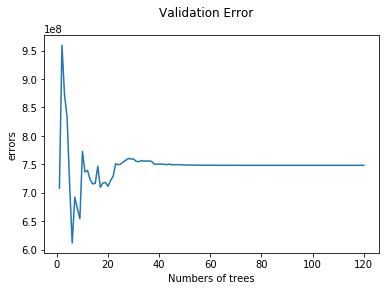

In [19]:
import matplotlib.pyplot as plt
n_estimators = [i for i in range(1,121)]

fig = plt.figure()
plt.plot(n_estimators, errors)
fig.suptitle('Validation Error')
plt.xlabel('Numbers of trees')
plt.ylabel('errors')


## Train the New Model with the best number of estimator:

In [20]:
gbr_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)

In [21]:
gbr_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=5,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
y_pred = gbr_best.predict(X_test)
y_pred

array([108568.80867098, 112049.5718551 , 102590.13026566, 102590.13026566,
       139223.94654689, 128262.06719965, 102590.13026566, 108568.80867098,
       112049.5718551 , 128262.06719965])